# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import essential libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split


Load the dataset.

In [13]:
import zipfile

# Use raw strings to avoid escape character issues
zip_path = '/content/drive/MyDrive/CNN_assignment/data.zip'
extract_path = '/content/dataset'

# Check and extract the zip file
if os.path.exists(zip_path) and zipfile.is_zipfile(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f" Dataset extracted to: {extract_path}")
else:
    print(" Zip file not found or invalid format.")


 Dataset extracted to: /content/dataset


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [16]:
def load_images_from_directory(base_dir, image_size=(128, 128)):
    images = []
    labels = []

    for class_name in os.listdir(base_dir + "/data"):  # Subfolders are class names
        class_path = os.path.join(base_dir, "data", class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                try:
                    img = Image.open(img_path).convert('RGB')  # Make sure image is RGB
                    img = img.resize(image_size)
                    images.append(np.array(img))
                    labels.append(class_name)
                except Exception as e:
                    print(f"❌ Could not process file {img_path}: {e}")

    return images, labels


In [17]:
# Load images and labels

dataset_path = '/content/dataset'
image_size = (128, 128)

images, labels = load_images_from_directory(dataset_path, image_size)
images = np.array(images)
labels = np.array(labels)

print(f"Total images loaded: {len(images)}")
print(f"Unique labels found: {set(labels)}")


Total images loaded: 7625
Unique labels found: {np.str_('Cardboard'), np.str_('Metal'), np.str_('Plastic'), np.str_('Glass'), np.str_('Other'), np.str_('Food_Waste'), np.str_('Paper')}


Image data shape: (7625, 128, 128, 3)
First 5 labels: ['Glass' 'Glass' 'Glass' 'Glass' 'Glass']


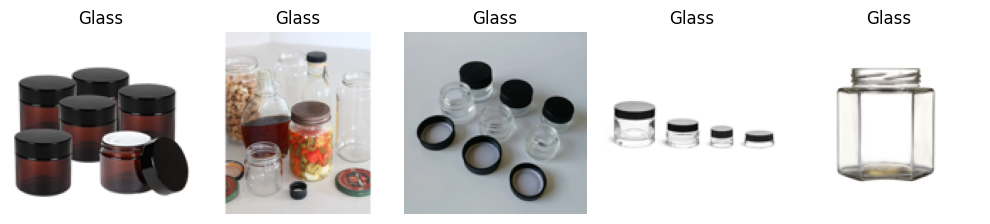

In [19]:
# Convert labels to numpy array (if not already done)
labels = np.array(labels)

# Verify if data looks correct
print(f"Image data shape: {images.shape}")
print(f"First 5 labels: {labels[:5]}")

# Show 5 sample images with labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i].astype('uint8'))  # Ensures correct display
    plt.title(labels[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

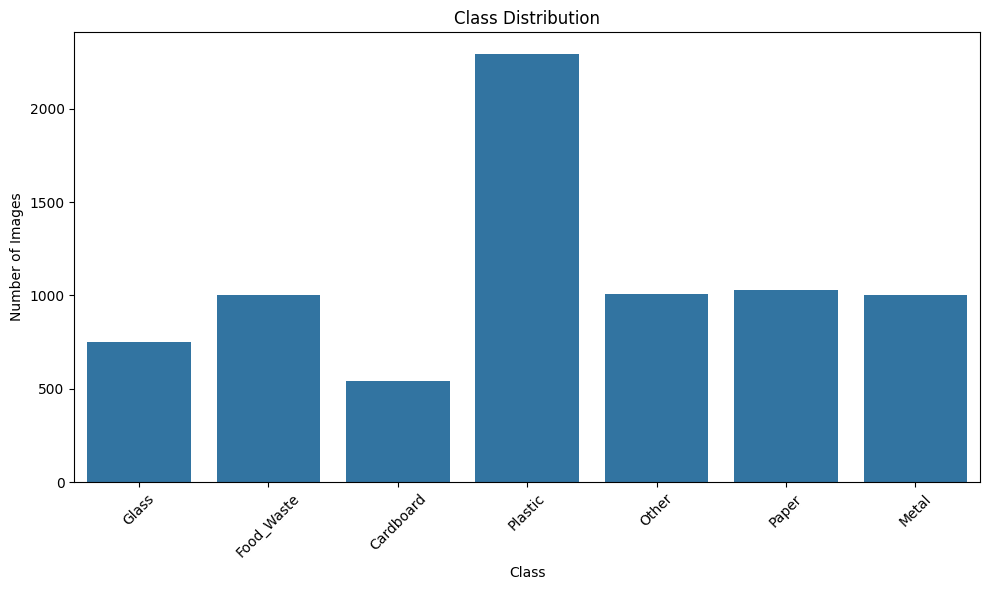

In [21]:
# Visualise Data Distribution

# Convert labels list to a pandas Series for easier plotting
label_series = pd.Series(labels)

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=label_series)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

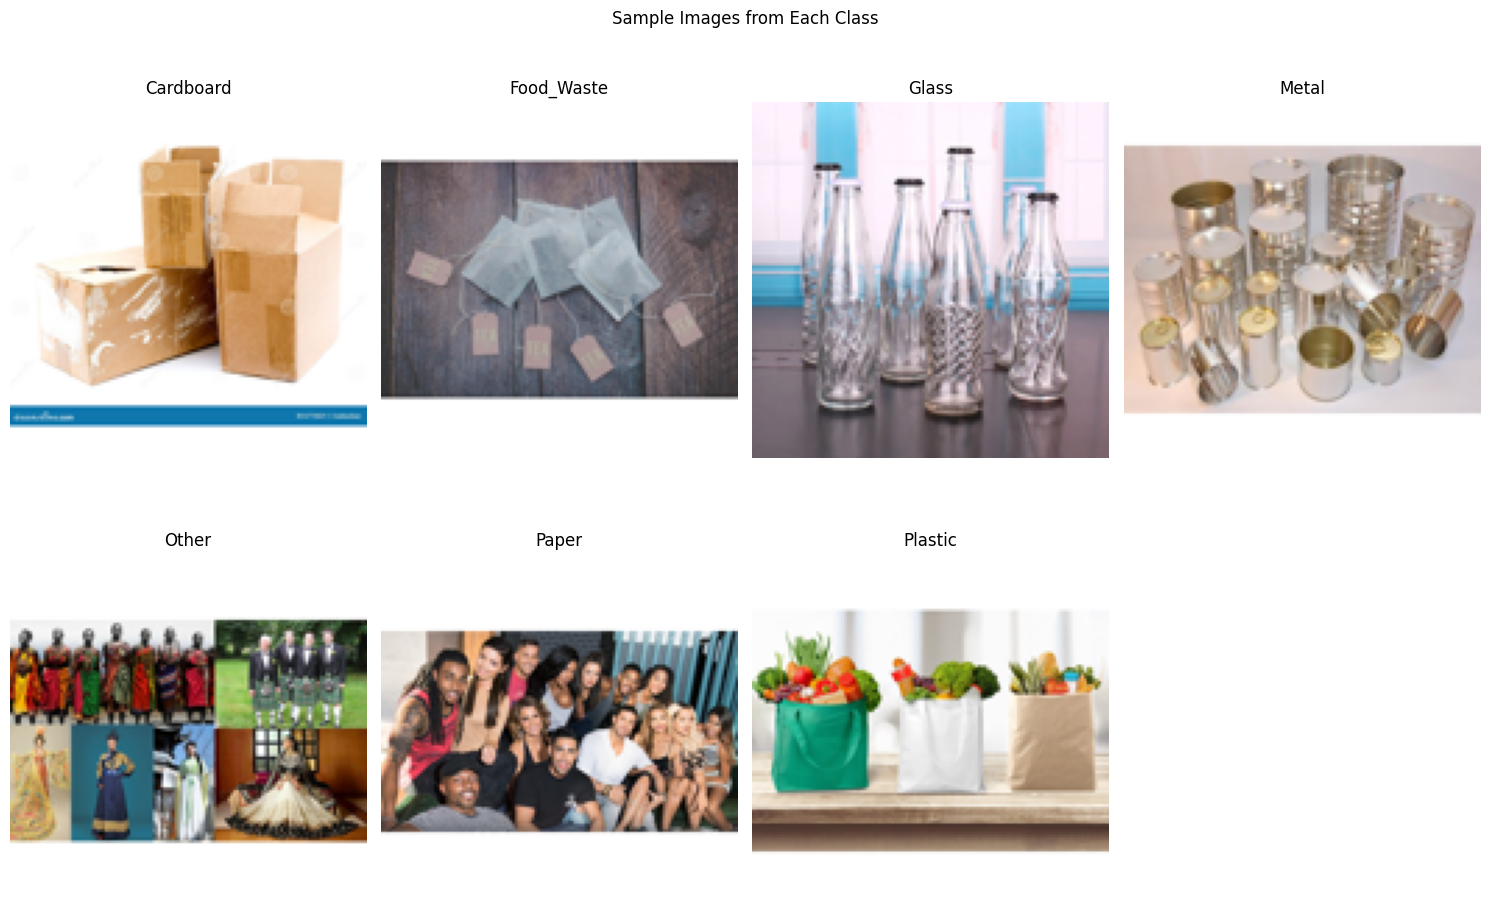

In [23]:
# Visualise Sample Images (across different labels)
import random

# Get unique classes
classes = sorted(set(labels))

# Plot sample images from each class
plt.figure(figsize=(15, 10))
for i, class_name in enumerate(classes):
    # Find indices where label == class_name
    class_indices = [idx for idx, lbl in enumerate(labels) if lbl == class_name]
    img_idx = random.choice(class_indices)

    plt.subplot(2, 4, i+1)  # adjust rows/cols depending on number of classes
    plt.imshow(images[img_idx])
    plt.title(class_name)
    plt.axis('off')

plt.suptitle("Sample Images from Each Class")
plt.tight_layout()
plt.show()



Check for Image size consistency

In [24]:
# Check that all images have the same shape
unique_shapes = set([img.shape for img in images])
print(f"Unique image shapes in dataset: {unique_shapes}")


Unique image shapes in dataset: {(128, 128, 3)}


Flatten all image pixels to view distribution


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [2]:
# Find the smallest and largest image dimensions from the data set
# Gather width and height of all images
widths = []
heights = []

for img in images:
    h, w = img.shape[:2]
    widths.append(w)
    heights.append(h)

# Find min and max
min_w, max_w = min(widths), max(widths)
min_h, max_h = min(heights), max(heights)

print(f"Smallest image dimensions: ({min_h}, {min_w})")
print(f"Largest image dimensions: ({max_h}, {max_w})")



NameError: name 'images' is not defined

In [ ]:
# Resize the image dimensions
# Resize all images to a consistent shape (128, 128)
resized_images = []

for img in images:
    img_resized = np.array(Image.fromarray((img * 255).astype(np.uint8)).resize(image_size))
    # Normalize the resized image back to [0, 1]
    img_resized = img_resized / 255.0
    resized_images.append(img_resized)

# Convert to numpy array
resized_images = np.array(resized_images)

print(f"All images resized to: {resized_images[0].shape}")



MemoryError: Unable to allocate 384. KiB for an array with shape (128, 128, 3) and data type float64

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [ ]:
# Encode the labels suitably



### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [ ]:
# Assign specified parts of the dataset to train and validation sets



## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [ ]:
# Build and compile the model



#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [ ]:
# Training



### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [ ]:
# Evaluate on the test set; display suitable metrics



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results